In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()

In [17]:
print("--     n    igaaa nifaaa adada  ---  ---".strip("-").strip().strip("-").strip().split())

['n', 'igaaa', 'nifaaa', 'adada']

In [28]:

#     Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
#     Maybe the Cabin letter could be a feature
#     Is there any info you can get from the ticket?




df = pd.read_csv("titanic_train.csv")
print(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


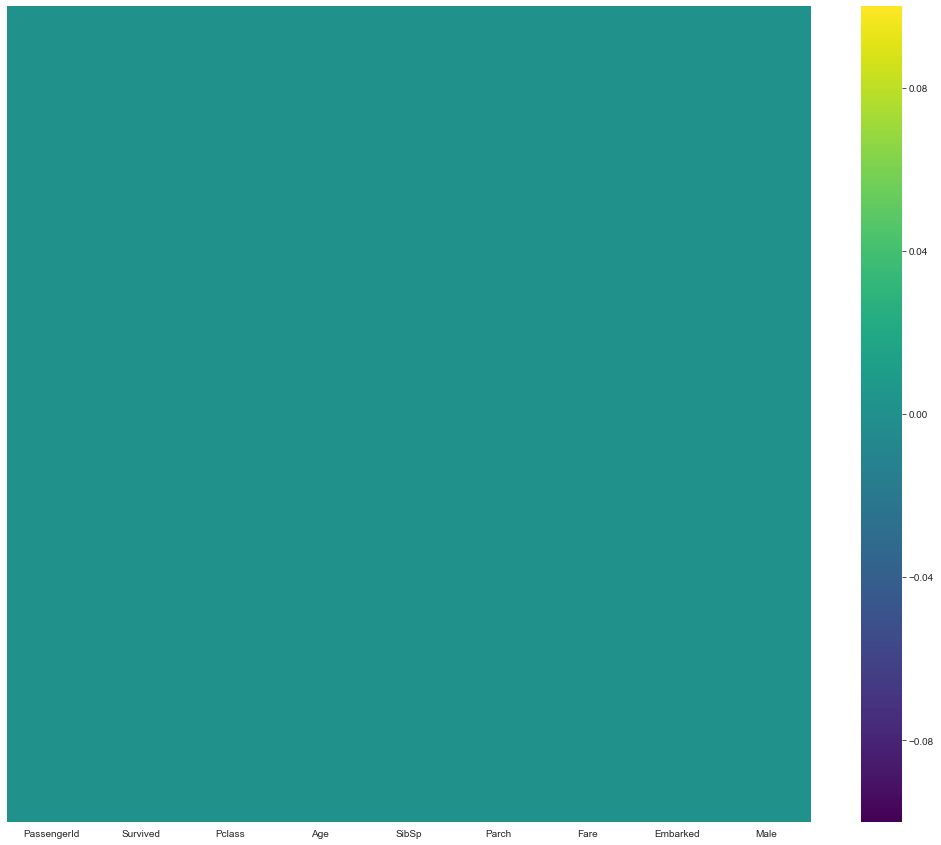

In [214]:
plt.figure(figsize=(18,15))
sns.heatmap(df.isnull(),yticklabels=False,cmap = "viridis")

In [52]:
print(df[df["Age"].isna()].count()[0])

177

In [55]:
print(df[df["Cabin"].isna()].count()[0])

687

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


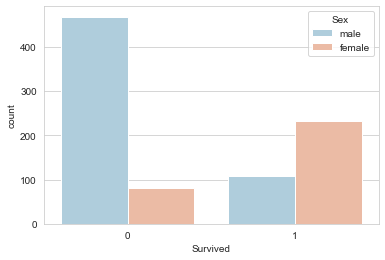

In [65]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df,hue="Sex",palette='RdBu_r')

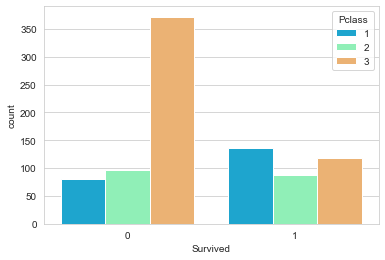

In [69]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

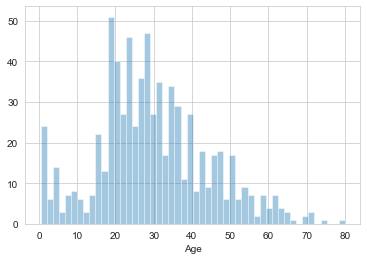

In [80]:
sns.distplot(df["Age"].dropna(),kde=False, bins= 50)

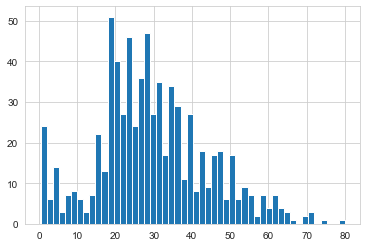

In [83]:
df["Age"].hist(bins=50)

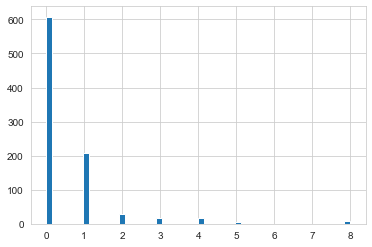

In [85]:
df["SibSp"].hist(bins=50)

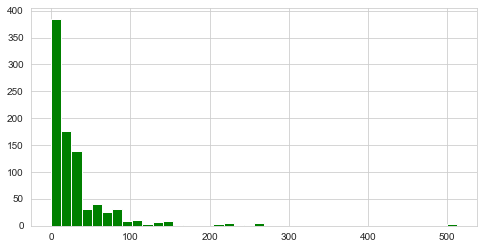

In [87]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [95]:
df["Fare"].iplot(kind="hist",bins=30)

# DATA CLEANING

38.233440860215055
29.87763005780347
25.14061971830986


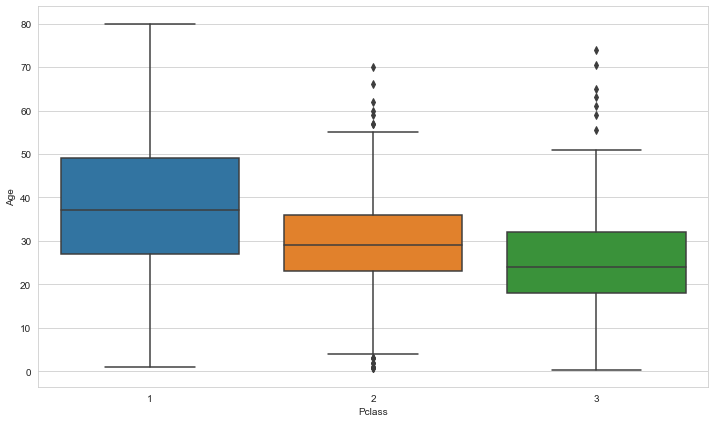

In [119]:
# df["Age"].plot()
plt.figure(figsize=(12, 7))
sns.boxplot("Pclass","Age",data=df)
plt.plot()

print((df[df["Pclass"]==1]["Age"]).mean())
print((df[df["Pclass"]==2]["Age"]).mean())
print((df[df["Pclass"]==3]["Age"]).mean())

In [120]:
# df

In [133]:
def imputeAge(cols):
    age = cols[0]
    cls = cols[1]
    
    if (cls == 1):
        return 38
    elif (cls == 2):
        return 30
    elif (cls==3):
        return 25
    else:
        return age

In [136]:
df["Age"] = df[["Age","Pclass"]].apply(imputeAge,axis=1)

In [161]:
# df["Male"] = pd.get_dummies(df["Sex"],drop_first=True)
# df.drop(["Sex"],axis=1,inplace=True)

In [166]:
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

In [174]:
embark = pd.get_dummies(df["Embarked"],drop_first=True)

In [180]:
# pd.concat([df,embark],axis=0,sort=False)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Male,Q,S
0,1.0,0.0,3.0,25.0,1.0,0.0,7.2500,S,1.0,NaN,NaN
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,C,0.0,NaN,NaN
2,3.0,1.0,3.0,25.0,0.0,0.0,7.9250,S,0.0,NaN,NaN
3,4.0,1.0,1.0,38.0,1.0,0.0,53.1000,S,0.0,NaN,NaN
4,5.0,0.0,3.0,25.0,0.0,0.0,8.0500,S,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [200]:
df["Embarked"].dropna()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [213]:
df.dropna(inplace=True)

In [217]:
df.drop("Embarked",axis=1,inplace=True)

In [218]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male
0,1,0,3,25,1,0,7.2500,1
1,2,1,1,38,1,0,71.2833,0
2,3,1,3,25,0,0,7.9250,0
3,4,1,1,38,1,0,53.1000,0
4,5,0,3,25,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,30,0,0,13.0000,1
887,888,1,1,38,0,0,30.0000,0
888,889,0,3,25,1,2,23.4500,0
889,890,1,1,38,0,0,30.0000,1


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null int64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Male           889 non-null uint8
dtypes: float64(1), int64(6), uint8(1)
memory usage: 56.4 KB


In [221]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.164229,0.524184,0.382452,32.096681,0.649044
std,256.998173,0.486260,0.834700,5.342969,1.103705,0.806761,49.697504,0.477538
min,1.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,25.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,25.000000,0.000000,0.000000,14.454200,1.000000
75%,668.000000,1.000000,3.000000,30.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,38.000000,8.000000,6.000000,512.329200,1.000000


# Logistic Regression Model

In [222]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train, y_test =  train_test_split(df.drop("Survived",axis=1),df["Survived"],test_size = 0.33,random_state=101)

In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
log = LogisticRegression()

In [229]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
prediction = log.predict(X_test)

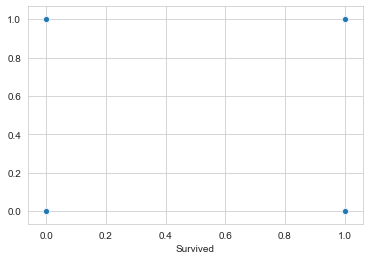

In [231]:
sns.scatterplot(x=y_test,y=prediction)

# EVALUATION OF MODEL 

In [232]:
from sklearn.metrics import classification_report

In [235]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       174
           1       0.85      0.65      0.74       120

    accuracy                           0.81       294
   macro avg       0.82      0.78      0.79       294
weighted avg       0.81      0.81      0.80       294

